In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# load the data set to see and get some info frm it
data = pd.read_csv('tire_wear_data_regression.csv')

# Convert all categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Tire Compound', 'Track Surface', 'Driving Style' , 'Weather'])

In [4]:
# get some head info on the data
data.head()

# get a summary of the data
data.info()

# carry out a more descriptive view of thedata
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track Temperature           10000 non-null  int64  
 1   Laps Driven                 10000 non-null  int64  
 2   Car Weight (kg)             10000 non-null  int64  
 3   Tire Wear (%)               10000 non-null  float64
 4   Tire Compound_Hard          10000 non-null  bool   
 5   Tire Compound_Medium        10000 non-null  bool   
 6   Tire Compound_Soft          10000 non-null  bool   
 7   Tire Compound_Wet           10000 non-null  bool   
 8   Track Surface_Rough         10000 non-null  bool   
 9   Track Surface_Smooth        10000 non-null  bool   
 10  Driving Style_Aggressive    10000 non-null  bool   
 11  Driving Style_Balanced      10000 non-null  bool   
 12  Driving Style_Conservative  10000 non-null  bool   
 13  Weather_Dry                 1000

,Track Temperature,Laps Driven,Car Weight (kg),Tire Wear (%)
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,29.561800,34.501100,674.988100,63.370089
std,11.454986,20.211933,43.310938,13.130952
min,10.000000,0.000000,600.000000,27.400000
25%,20.000000,17.000000,637.000000,54.114286
50%,30.000000,35.000000,676.000000,63.485714
75%,39.000000,52.000000,712.000000,72.800000
max,49.000000,69.000000,749.000000,99.514286


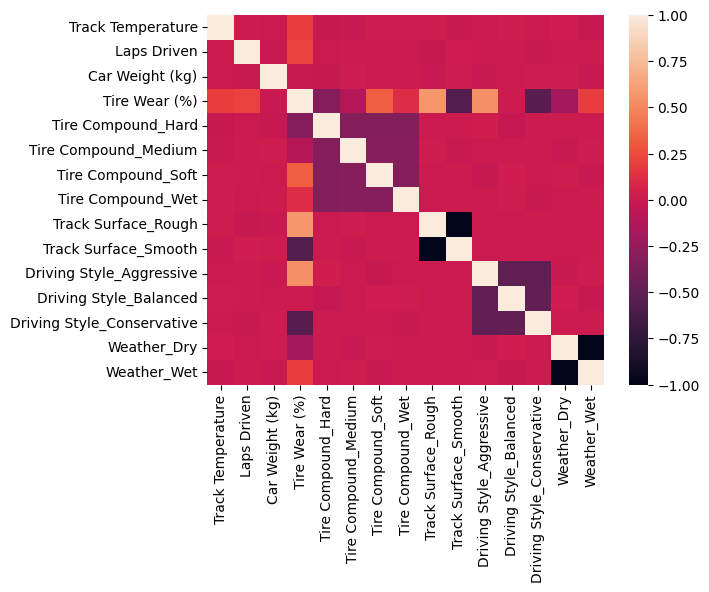

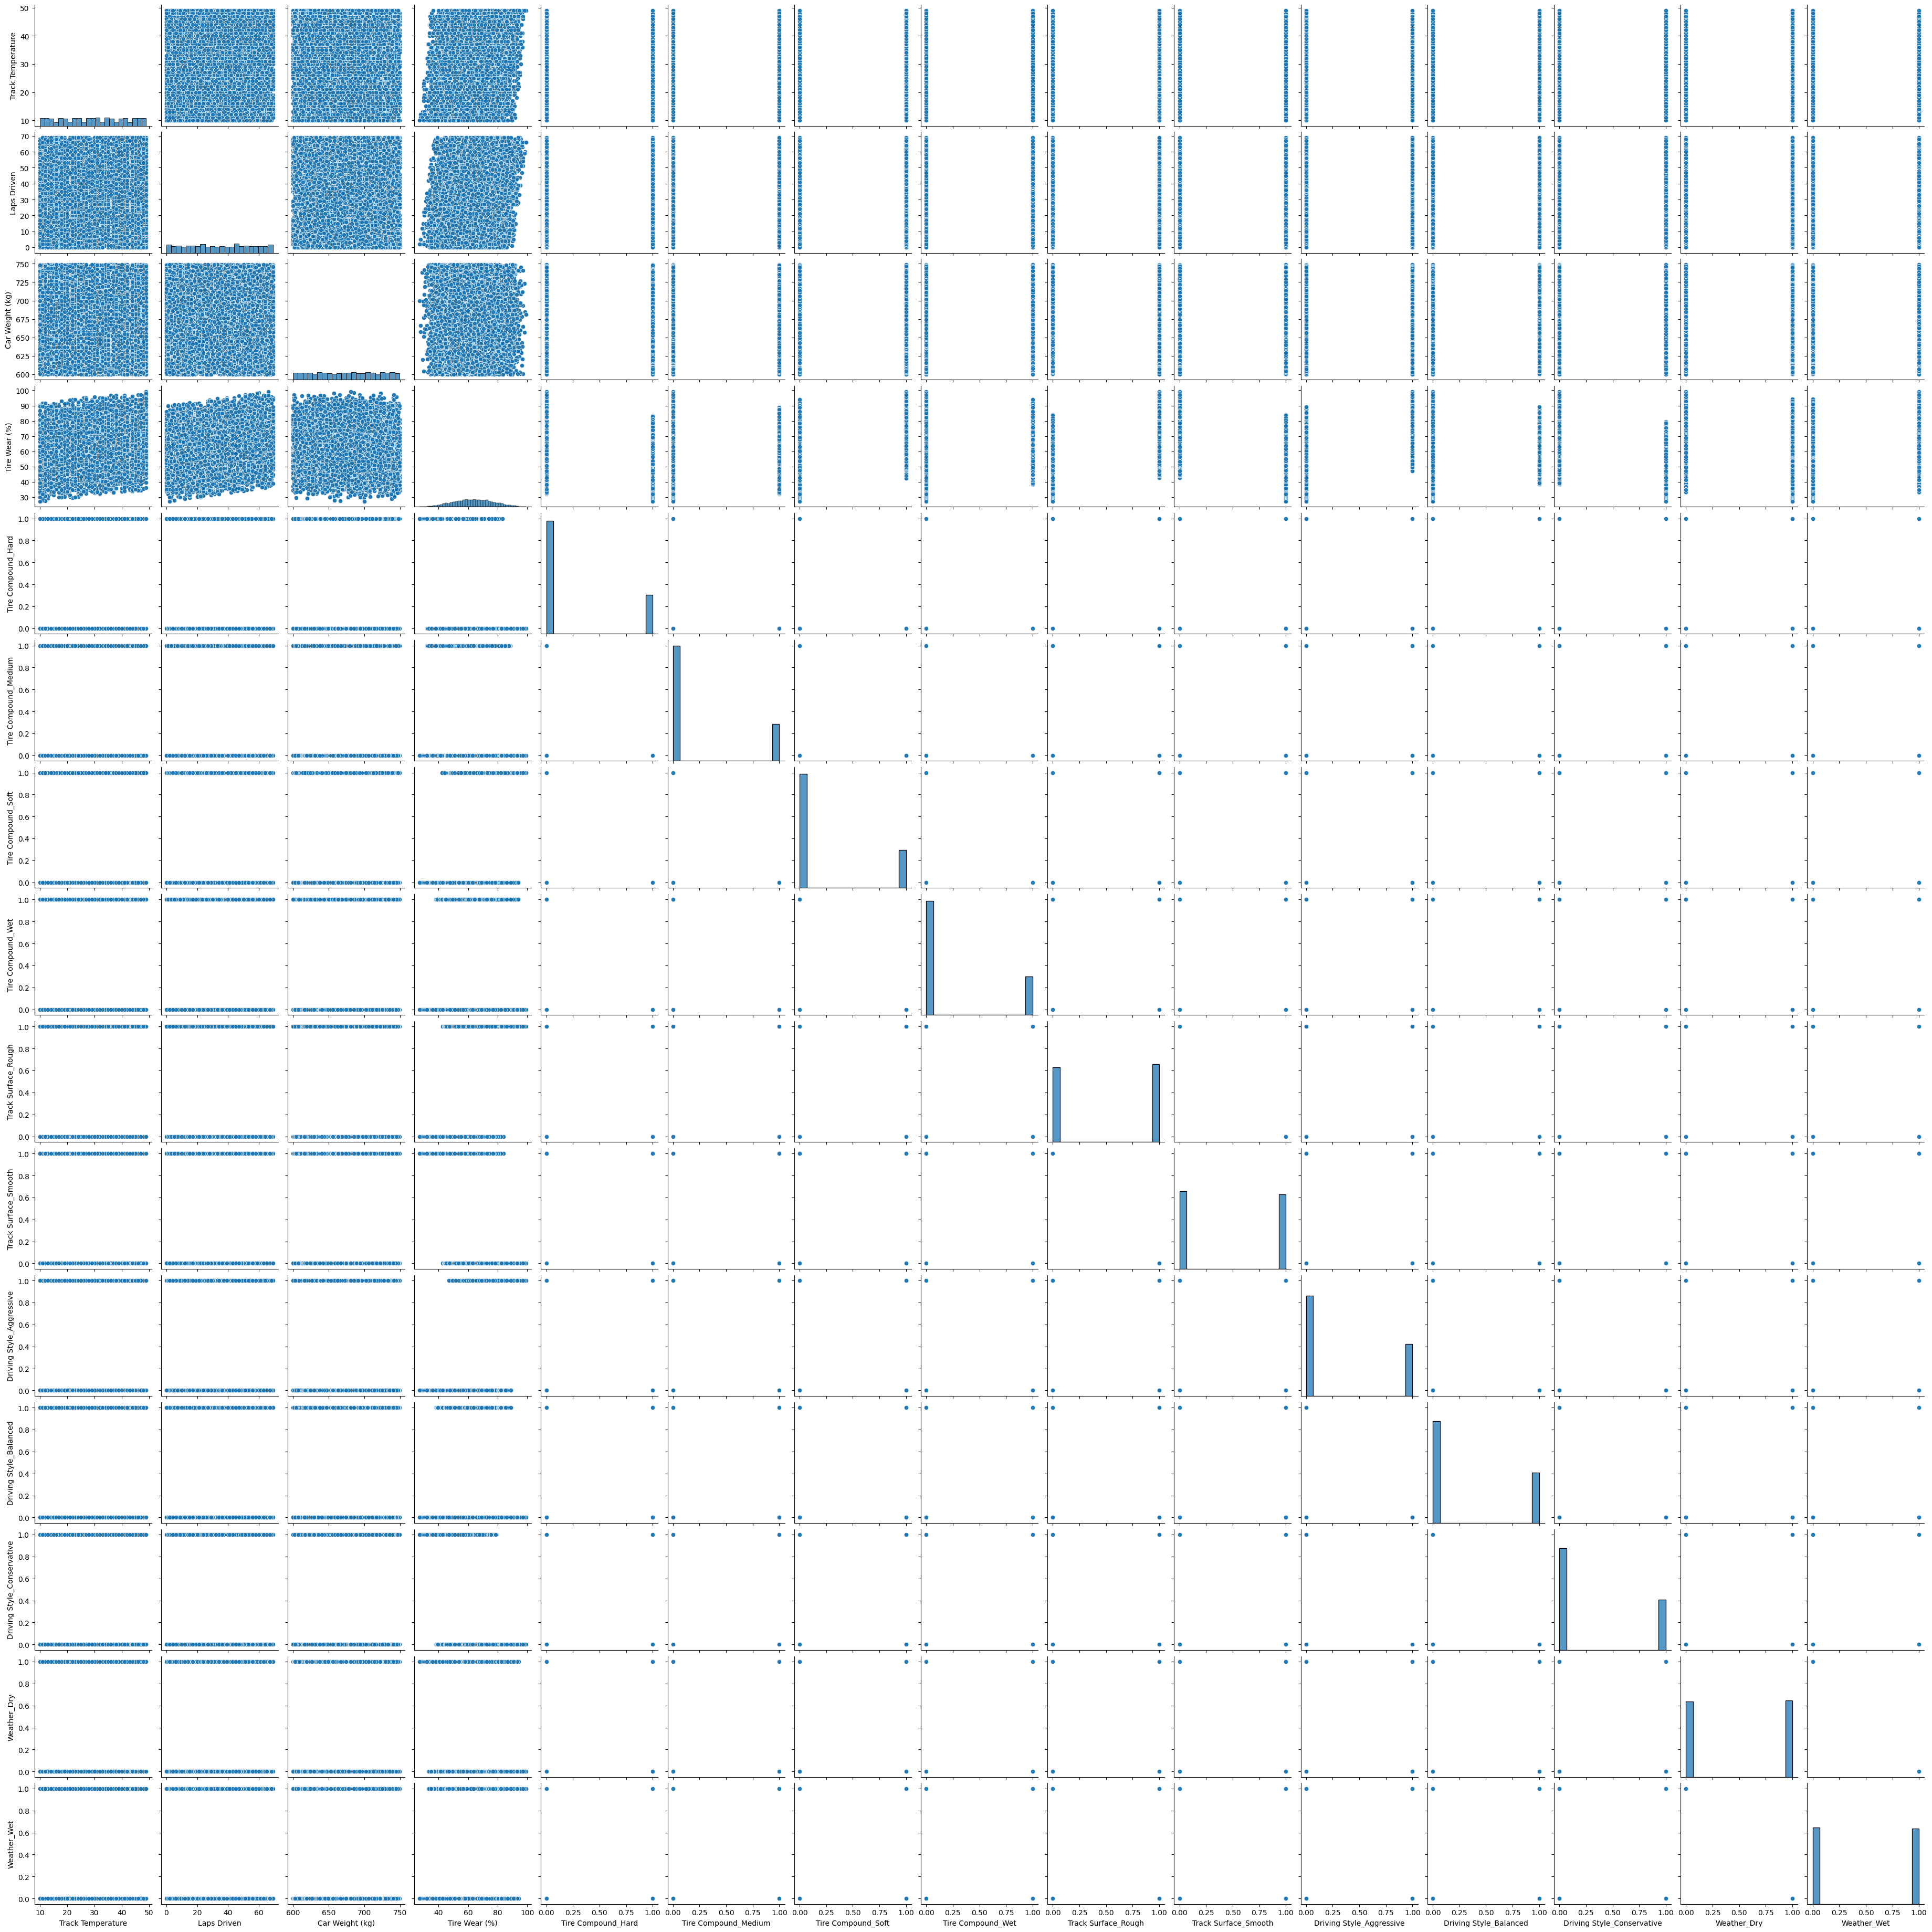

In [ ]:
# just draw a head map to show us how the features of the houses correlate
sns.heatmap(data.corr())
# plot a pair plot in sns
sns.pairplot(data)

In [ ]:
# extract the x and y values of the data
X = data.drop(columns=['Tire Wear (%)'])  # Select all columns except 'Tire Wear(%)'
y = data['Tire Wear (%)']

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Track Temperature           10000 non-null  int64
 1   Laps Driven                 10000 non-null  int64
 2   Car Weight (kg)             10000 non-null  int64
 3   Tire Compound_Hard          10000 non-null  bool 
 4   Tire Compound_Medium        10000 non-null  bool 
 5   Tire Compound_Soft          10000 non-null  bool 
 6   Tire Compound_Wet           10000 non-null  bool 
 7   Track Surface_Rough         10000 non-null  bool 
 8   Track Surface_Smooth        10000 non-null  bool 
 9   Driving Style_Aggressive    10000 non-null  bool 
 10  Driving Style_Balanced      10000 non-null  bool 
 11  Driving Style_Conservative  10000 non-null  bool 
 12  Weather_Dry                 10000 non-null  bool 
 13  Weather_Wet                 10000 non-null  bool 
dtypes: bool

In [ ]:
# split our data in to the training and test data
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Train the regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# make some Prediction in the model
y_pred = lin_model.predict(X_test)

# plot the predicted values with the test values
mean_abo_err = mean_absolute_error(y_test, y_pred)
print(mean_abo_err)

# mean error score
mean_error_score = np.sqrt(mean_absolute_error(y_test, y_pred))
print(mean_error_score)


# print the model score to predict the values
print(lin_model.score(X_test, y_test) * 100)

3.643307877609914e-14
1.908745105458011e-07
100.0


In [ ]:
from sklearn.linear_model import SGDRegressor

# Set up the gradient descent regressor with linear loss
gradient_descent_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
gradient_descent_model.fit(X_train, y_train)

# Predict on test data
y_pred_gd = gradient_descent_model.predict(X_test)

# Calculate MSE for evaluation
mse_gd = mean_squared_error(y_test, y_pred_gd)
print("Gradient Descent Linear Regression MSE:", mse_gd)


Gradient Descent Linear Regression MSE: 1.12014643345664e+28


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree MSE:", mse_dt)

# Random Forest Model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)


Decision Tree MSE: 0.54146693877551
Random Forest MSE: 0.19180866673469274


In [ ]:
import joblib

# Find the best model based on MSE
best_model = None
lowest_mse = min(mse_gd, mse_dt, mse_rf)

if lowest_mse == mse_gd:
    best_model = gradient_descent_model
    model_name = "Gradient Descent Linear Regression"
elif lowest_mse == mse_dt:
    best_model = decision_tree_model
    model_name = "Decision Tree"
else:
    best_model = random_forest_model
    model_name = "Random Forest"

print(f"Best model is {model_name} with an MSE of {lowest_mse}")

# Save the best model
joblib.dump(best_model, 'tire_wear_model.pkl')


Best model is Random Forest with an MSE of 0.19180866673469274


['tire_wear_model.pkl']

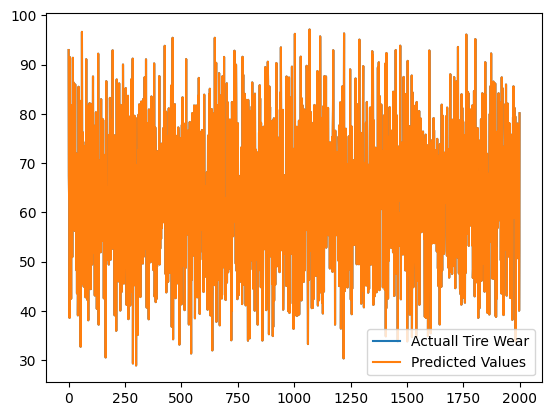

In [ ]:
y_test_wear = y_test.values.flatten()

# plots
plt.plot(y_test_wear, label='Actuall Tire Wear')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()

In [ ]:
# Make a prediction for one specific data point from the test set
# Select a single row and convert booleans to integers
row_index = 20
single_row = X_test.iloc[[row_index]].astype(int)

# Make a prediction with the selected row
tire_wear_prediction = best_model.predict(single_row)

# Display the input features and prediction
print("Input features for prediction:")
print(single_row)
print("\nPredicted Tire Wear:", f'{tire_wear_prediction[0]:.2f}%')


# Custom input for aggressive driving on a wet day with a soft tire on a smooth surface
custom_input_1 = [[33, 10, 800, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]]  # Example encoding: 33°C, 10 laps, 800kg, soft tire, smooth surface, aggressive style, wet weather
prediction_1 = best_model.predict(custom_input_1)
print("Predicted tire wear for custom input:", f'{prediction_1[0]:.2f}%')


Input features for prediction:
     Track Temperature  Laps Driven  Car Weight (kg)  Tire Compound_Hard  \
243                 33            6              737                   0   

     Tire Compound_Medium  Tire Compound_Soft  Tire Compound_Wet  \
243                     0                   0                  1   

     Track Surface_Rough  Track Surface_Smooth  Driving Style_Aggressive  \
243                    1                     0                         0   

     Driving Style_Balanced  Driving Style_Conservative  Weather_Dry  \
243                       0                           1            0   

     Weather_Wet  
243            1  

Predicted Tire Wear: 63.13%
Predicted tire wear for custom input: 72.89%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import asyncio
import uvicorn
from typing import Annotated
from fastapi import FastAPI, Depends, HTTPException, status, Path
from pydantic import BaseModel, Field
import numpy as np
import joblib
import nest_asyncio

# Load the best model (replace 'path/to/model.joblib' with the actual path)
best_model = joblib.load('tire_wear_model.pkl')

app = FastAPI()

# Define the request body model for tire wear prediction
class TireWearRequest(BaseModel):
    track_temperature: float = Field(gt=0, lt=100, description="Temperature of the track in Celsius.")
    laps_driven: int = Field(gt=0, lt=1000, description="Number of laps driven.")
    car_weight: float = Field(gt=500, lt=5000, description="Weight of the car in kilograms.")
    tire_compound_hard: int = Field(ge=0, le=1, description="1 if Hard tire compound, otherwise 0.")
    tire_compound_medium: int = Field(ge=0, le=1, description="1 if Medium tire compound, otherwise 0.")
    tire_compound_soft: int = Field(ge=0, le=1, description="1 if Soft tire compound, otherwise 0.")
    tire_compound_wet: int = Field(ge=0, le=1, description="1 if Wet tire compound, otherwise 0.")
    track_surface_rough: int = Field(ge=0, le=1, description="1 if Rough track surface, otherwise 0.")
    track_surface_smooth: int = Field(ge=0, le=1, description="1 if Smooth track surface, otherwise 0.")
    driving_style_aggressive: int = Field(ge=0, le=1, description="1 if Aggressive driving style, otherwise 0.")
    driving_style_balanced: int = Field(ge=0, le=1, description="1 if Balanced driving style, otherwise 0.")
    driving_style_conservative: int = Field(ge=0, le=1, description="1 if Conservative driving style, otherwise 0.")
    weather_dry: int = Field(ge=0, le=1, description="1 if weather is Dry, otherwise 0.")
    weather_wet: int = Field(ge=0, le=1, description="1 if weather is Wet, otherwise 0.")

@app.get("/class")
async def get_greet():
    return {"Message": "Hello Everyone"}

@app.get("/", status_code=status.HTTP_200_OK)
async def get_hello():
    return {"hello": "world"}

@app.post('/predict', status_code=status.HTTP_200_OK)
async def make_prediction(request: TireWearRequest):
    try:
        # Prepare the input row in the correct order
        input_data = [[
            request.track_temperature,
            request.laps_driven,
            request.car_weight,
            request.tire_compound_hard,
            request.tire_compound_medium,
            request.tire_compound_soft,
            request.tire_compound_wet,
            request.track_surface_rough,
            request.track_surface_smooth,
            request.driving_style_aggressive,
            request.driving_style_balanced,
            request.driving_style_conservative,
            request.weather_dry,
            request.weather_wet
        ]]

        # Make the prediction
        predicted_tire_wear = best_model.predict(input_data)
        return {"predicted_tire_wear": predicted_tire_wear[0]}

    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Prediction failed with error: {str(e)}")

